<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#References" data-toc-modified-id="References-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** Baysian regression

</font>
</div>

# Imports
<hr style = "border:2px solid black" ></hr>

In [3]:
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns

In [4]:
sns.set(style="darkgrid", palette="muted")

In [6]:
def simulate_linear_data(
        start, stop, N, beta_0, beta_1, eps_mean, eps_sigma_sq):
    """
    Simulate a random dataset using a noisy
    linear process.

    Parameters
    ----------
    N: `int`
        Number of data points to simulate
    beta_0: `float`
        Intercept
    beta_1: `float`
        Slope of univariate predictor, X

    Returns
    -------
    df: `pd.DataFrame`
        A DataFrame containing the x and y values
    """
    # Create a pandas DataFrame with column 'x' containing
    # N uniformly sampled values between 0.0 and 1.0
    df = pd.DataFrame(
        {"x":
            np.linspace(start, stop, num=N)
         }
    )
    # Use a linear model (y ~ beta_0 + beta_1*x + epsilon) to
    # generate a column 'y' of responses based on 'x'
    df["y"] = beta_0 + beta_1*df["x"] + np.random.RandomState(s).normal(
        eps_mean, eps_sigma_sq, N
    )
    return df

In [7]:
def plot_simulated_data(df):
    """
    Plot the simulated data with sns.lmplot().

    Parameters
    ----------
    df: `pd.DataFrame`
        A DataFrame containing the x and y values
    """
    # Plot the data, and a frequentist linear regression fit
    # using the seaborn package
    sns.lmplot(x="x", y="y", data=df, height=10)
    plt.xlim(0.0, 1.0)
    plt.show()

In [8]:
def glm_mcmc_inference(df, iterations=5000):
    """
    Calculates the Markov Chain Monte Carlo trace of
    a Generalised Linear Model Bayesian linear regression 
    model on supplied data.

    Parameters
    ----------
    df: `pd.DataFrame`
        DataFrame containing the data
    iterations: `int`
        Number of iterations to carry out MCMC for
    """
    # Create the glm using the Bambi model syntax
    model = bmb.Model("y ~ x", df)

    # Fit the model using a NUTS (No-U-Turn Sampler)
    trace = model.fit(
        draws=5000,
        tune=500,
        discard_tuned_samples=True,
        chains=1,
        progressbar=True)
    return trace

In [9]:
def plot_glm_model(trace):
    """
    Plot the trace generated from fitting the model. 

    Parameters
    ----------
    trace: `tracepymc.backends.base.MultiTrace`
        A MultiTrace or ArviZ InferenceData object that contains the samples.
    """
    pm.plot_trace(trace)
    plt.tight_layout()
    plt.show()

In [10]:
def plot_regression_lines(trace, df, N):
    """
    Plot the simulated data with True and estimated regression lines.

    Parameters
    ----------
    trace: `tracepymc.backends.base.MultiTrace`
        A MultiTrace or ArviZ InferenceData object that contains the samples.
    df: `pd.DataFrame`
        DataFrame containing the data
    N: `int`
        Number of data points to simulate
    """
    fig, ax = plt.subplots(figsize=(7, 7))
    # define x axis ticks
    x = np.linspace(0, 1, N)
    # plot simulated data observations
    ax.scatter(df['x'], df['y'])
    # extract slope and intercept draws from PyMC trace
    intercepts = trace.posterior.Intercept.to_numpy()[0]
    slopes = trace.posterior.x.to_numpy()[0]
    # plot 100 random samples from the slope and intercept draws
    sample_indexes = np.random.randint(len(intercepts), size=100)
    for i in sample_indexes:
        y_line = intercepts[i] + slopes[i] * x
        ax.plot(x, y_line, c='black', alpha=0.07)
    # plot true regression line
    y = beta_0 + beta_1*x
    ax.plot(x, y, label="True Regression Line", lw=3., c="green")
    ax.legend(loc=0)
    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(0.0, 4.0)
    plt.show()

In [11]:
# These are our "true" parameters
beta_0 = 1.0  # Intercept
beta_1 = 2.0  # Slope

# Simulate 100 data points between 0 and 1, with a variance of 0.5
start = 0
stop = 1
N = 100
eps_mean = 0.0
eps_sigma_sq = 0.5

# Fix Random Seed
s = 42

In [12]:
# Simulate the "linear" data using the above parameters
df = simulate_linear_data(
    start, stop, N, beta_0, beta_1, eps_mean, eps_sigma_sq
)

In [ ]:
# Plot the simulated data
plot_simulated_data(df)

In [ ]:
# Fit the GLM
trace = glm_mcmc_inference(df, iterations=5000)

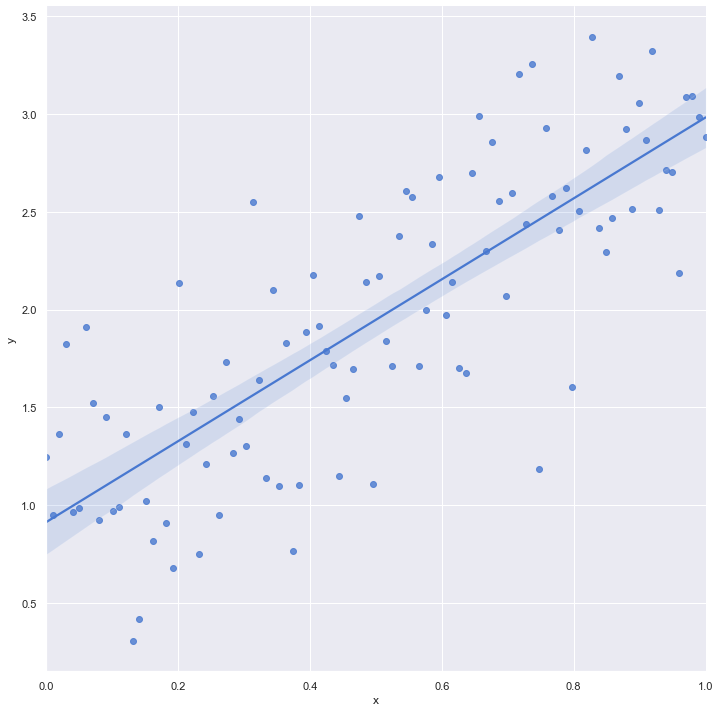

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [Intercept, x, y_sigma]


Sampling 1 chain for 500 tune and 5_000 draw iterations (500 + 5_000 draws total) took 8 seconds.


FileNotFoundError: [Errno 2] No such file or directory: '/opt/anaconda3/envs/ML4T/lib/python3.10/site-packages/numpy-1.22.1.dist-info/METADATA'

In [13]:
# Plot the GLM
plot_glm_model(trace)
plot_regression_lines(trace, df, N)

# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- https://www.quantstart.com/advanced-algorithmic-trading-ebook/ 
- https://www.quantstart.com/articles/Bayesian-Linear-Regression-Models-with-PyMC3/

</font>
</div>